<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plots_fs2_vs_cosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#todo
- copy data cosmos to directory
- copy fs2.0 without shapes to directory
- recreat same file for fs2.1
- plot for color cut color cut
- plot for sample seleciton
- write section in paper

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from google.colab import files

In [2]:
use_tex = True

In [3]:
if use_tex:
  !apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

# download data

#### COSMOS catalogue (matched catalogue with photometry from COSMOS15 and shapes from ACS-GC)

In [4]:
!gdown 1AIfvOQVjp9w_rvTu2yfz_GLZ2eBjDFc4

Downloading...
From: https://drive.google.com/uc?id=1AIfvOQVjp9w_rvTu2yfz_GLZ2eBjDFc4
To: /content/matched_L15_ACS-GC_dangmax0p6_dmagmax1p0_sortdang_cutks.cvs.bz2
100% 13.6M/13.6M [00:00<00:00, 72.9MB/s]


In [5]:
fname_cosmos = 'matched_L15_ACS-GC_dangmax0p6_dmagmax1p0_sortdang_cutks.cvs.bz2'

cosmos = pd.read_csv(fname_cosmos, sep=',', comment='#', na_values = '\\N')

In [6]:
# apparent magnitude cut
cosmos = cosmos[cosmos.ip_mag_aper3<24]

# projected 2D axis ratios
cosmos['q_proj'] = cosmos.b_a_G1

In [7]:
!gdown 1qFF0B7yj-gevSoO8hG7Y-TlN6Coc9fVz

Downloading...
From: https://drive.google.com/uc?id=1qFF0B7yj-gevSoO8hG7Y-TlN6Coc9fVz
To: /content/13199.parquet
100% 16.3M/16.3M [00:00<00:00, 62.2MB/s]


#### Flagship 2.1

In [8]:
flagship = pd.read_parquet('13199.parquet')

In [9]:
### compute magnitudes
def flux2mag (f):
    return -2.5 * np.log10(f) - 48.6

flagship.loc[:,'sdss_i_mag'] = flux2mag(flagship.sdss_i)
flagship.loc[:,'subaru_i_mag'] = flux2mag(flagship.subaru_i)
flagship.loc[:,'cfht_u_abs_mag'] = flux2mag(flagship.cfht_u_abs)
flagship.loc[:,'subaru_r_abs_mag'] = flux2mag(flagship.subaru_r_abs)

# projected 2D axis ratios
flagship.loc[:,'eps_abs'] = (flagship.eps1_gal**2 + flagship.eps2_gal**2)**0.5
flagship.loc[:,'q_proj'] = (1-flagship.eps_abs) / (1+flagship.eps_abs);

# apply i<24 cut
flagship = flagship[flagship.subaru_i_mag<24]

# plot magnitude-redshifts distributions

#### redshift vs. apparent r-band magnitudes

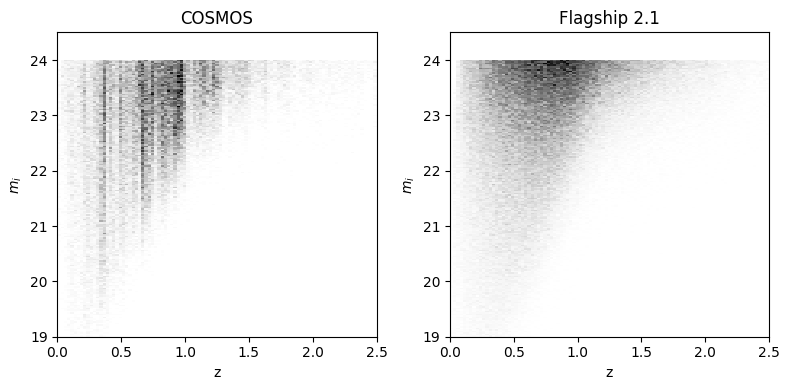

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

m_bins=np.linspace(19,24.5,200)
z_bins=np.linspace(0,2.5,100)
mz_bins=[z_bins,m_bins]

ax[0].hist2d(cosmos.photoz, cosmos.ip_mag_aper3,bins=mz_bins, cmap='Greys')
ax[1].hist2d(flagship.true_redshift_gal, flagship.subaru_i_mag,bins=mz_bins, cmap='Greys')


for i in range(2):
    ax[i].set_xlabel('z')
    ax[i].set_ylabel('$m_i$')

ax[0].set_title('COSMOS')
ax[1].set_title('Flagship 2.1')

plt.tight_layout()

plt.show()

#### redshift vs. absolute r-band magnitudes

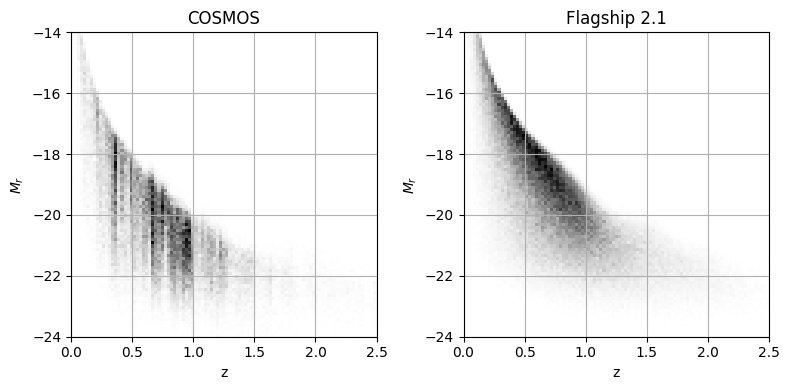

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

m_bins=np.linspace(-24,-14,100)
z_bins=np.linspace(0,2.5,100)
mz_bins=[z_bins,m_bins]

ax[0].hist2d(cosmos.photoz, cosmos.m_r,bins=mz_bins, cmap='Greys', density=True)
ax[1].hist2d(flagship.true_redshift_gal, flagship.subaru_r_abs_mag,bins=mz_bins, cmap='Greys', density=True)

ax[0].set_title('COSMOS')
ax[1].set_title('Flagship 2.1')

for i in range(2):
    ax[i].set_ylabel('$M_r$')
    ax[i].set_xlabel('z')
    ax[i].grid()

plt.tight_layout()

plt.show()

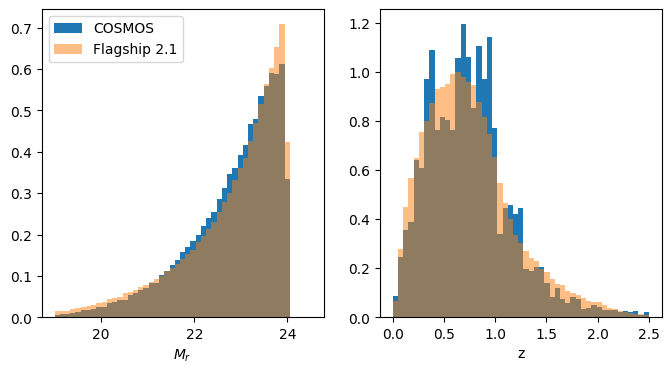

In [12]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

m_bins=np.linspace(19,24.5,50)
z_bins=np.linspace(0,2.5,50)

ax[0].set_xlabel('$M_r$')
ax[0].hist(cosmos.ip_mag_aper3, bins=m_bins, density=True, label='COSMOS')
ax[0].hist(flagship.subaru_i_mag, bins=m_bins, density=True, alpha=0.5, label='Flagship 2.1')

ax[1].set_xlabel('z')
ax[1].hist(cosmos.photoz, bins=z_bins, density=True, label='COSMOS')
ax[1].hist(flagship.true_redshift_gal, bins=z_bins, alpha=0.5, density=True, label='Flagship 2.1')

ax[0].legend()

plt.show()

# color cuts on u-r restframe color index

In [13]:
cosmos.loc[:,'ur'] = cosmos.m_u - cosmos.m_r
flagship.loc[:,'ur'] = flagship.cfht_u_abs_mag - flagship.subaru_r_abs_mag

In [14]:
ur_cut_cosmos = 1.2
ur_cut_flagship = 1.32

#### red and blue sub-samples

In [15]:
cosmos_r = cosmos[cosmos.ur > ur_cut_cosmos]
cosmos_b = cosmos[cosmos.ur <= ur_cut_cosmos]

flagship_r = flagship[flagship.ur > ur_cut_flagship]
flagship_b = flagship[flagship.ur <= ur_cut_flagship]

#### compare global fraction of blue galaxies

In [16]:
print('COSMOS:' ,len(cosmos_b)/len(cosmos))
print('Flagship :' ,len(flagship_b)/len(flagship))

COSMOS: 0.71693637441889
Flagship : 0.7236124528654679


# plot color-redshift distribution

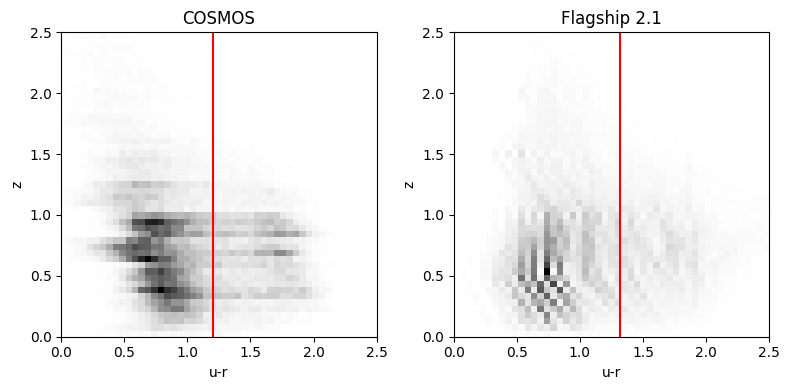

In [17]:

fig, ax = plt.subplots(1,2,figsize=(8,4))

c_bins=np.linspace(0,2.5,50)
z_bins=np.linspace(0,2.5,50)
cz_bins=[c_bins,z_bins]

ax[0].hist2d(cosmos.ur, cosmos.photoz,bins=cz_bins, cmap='Greys')
ax[1].hist2d(flagship.ur, flagship.true_redshift_gal,bins=cz_bins, cmap='Greys')

for i in range(2):
    ax[i].set_xlabel('u-r')
    ax[i].set_ylabel('z')

ax[0].axvline(x=ur_cut_cosmos, c='r')
ax[1].axvline(x=ur_cut_flagship, c='r')

ax[0].set_title('COSMOS')
ax[1].set_title('Flagship 2.1')

plt.tight_layout()

plt.show()

In [18]:
fname = 'color_distribution_cosmos_vs_fs2.pdf'

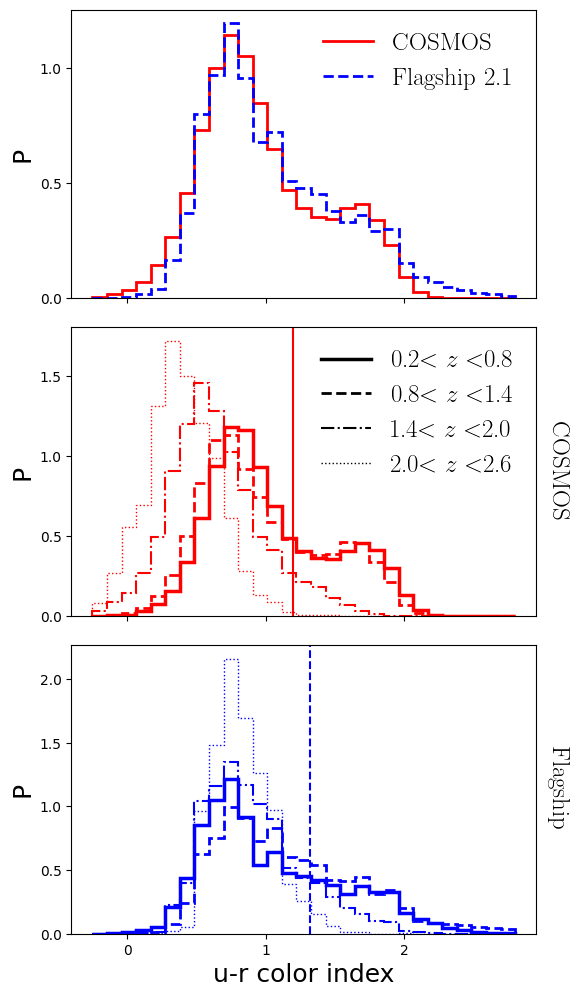

In [19]:
fig, ax = plt.subplots(3,1,figsize=(6,12), sharex=True)

plt.subplots_adjust(hspace=0.1)

fontsize=18
fontsize_legend=18

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)

dz=0.6
zmin = 0.2

c_bins=np.linspace(-0.25,2.8,30)


#====== top panel =====
vcol=['r','b']
vls=['-','--']


ax[0].hist(cosmos.ur, bins=c_bins, histtype='step', density=True,color='r',lw=2, ls=vls[0], label='COSMOS')
ax[0].hist(flagship.ur, bins=c_bins, histtype='step', density=True,color='b',lw=2, ls=vls[1], label='Flagship 2.1')

#set legend
handles, labels = ax[0].get_legend_handles_labels()
lines = [Line2D([0], [0], color=vcol[i], linewidth=2, linestyle=vls[i]) for i in range(len(vls))]
ax[0].legend(lines, labels, loc='upper right',frameon=False,fontsize=fontsize_legend)

# vertrical lines for color cuts
ax[1].axvline(x=ur_cut_cosmos, ls=vls[0], c=vcol[0])
ax[2].axvline(x=ur_cut_flagship, ls=vls[1], c=vcol[1])


#====== central and bottom panels =====
vls=['-','--','-.',':']
vlw=[2.5,2.0,1.5,1.0]


for i,zlo in enumerate([0.2,0.8,1.4,2.0]):

  zhi = round(zlo+dz,5)

  zlabel = str(zlo) + '$< z < $' + str(zhi)

  smp_cosmos = cosmos[(zlo<=cosmos.photoz) & (cosmos.photoz<zhi)]
  smp_flagship = flagship[(zlo<=flagship.true_redshift_gal) & (flagship.true_redshift_gal<zhi)]

  ax[1].hist(smp_cosmos.ur, bins=c_bins, histtype='step', density=True,color='r',lw=vlw[i], ls=vls[i],label=zlabel)
  ax[2].hist(smp_flagship.ur, bins=c_bins, histtype='step', density=True,color='b',lw=vlw[i], ls=vls[i],label=zlabel)


ax[-1].set_xlabel('u-r color index',fontsize=fontsize)

#set legend
handles, labels = ax[1].get_legend_handles_labels()
lines = [Line2D([0], [0], color='k', linewidth=vlw[i], linestyle=vls[i]) for i in range(len(labels))]
ax[1].legend(lines, labels, loc='upper right',frameon=False,fontsize=fontsize_legend)


for i in range(3):
  ax[i].set_ylabel('P', fontsize=fontsize)

# label  on right-hand side of loewr panels
ax[1].text(1.05,0.5, 'COSMOS', {'color': 'k', 'fontsize': fontsize}, rotation=-90, ha='center', va='center', transform = ax[1].transAxes)
ax[2].text(1.05,0.5, 'Flagship', {'color': 'k', 'fontsize': fontsize}, rotation=-90, ha='center', va='center', transform = ax[2].transAxes)

plt.savefig(fname,bbox_inches='tight', pad_inches = 0.1)

plt.show()

In [20]:
fname = 'color_distribution_cosmos_vs_fs2_v2.pdf'

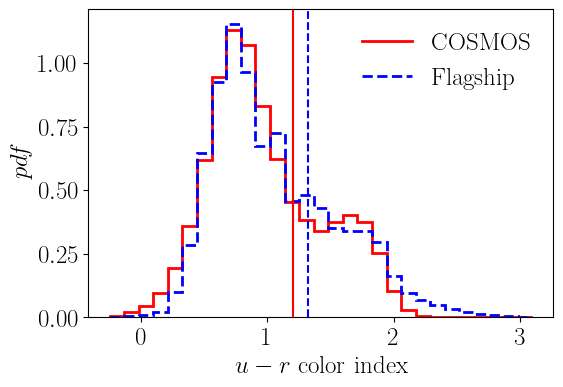

In [21]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

plt.subplots_adjust(hspace=0.1)

fontsize=18
fontsize_legend=18

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)

dz=0.6
zmin = 0.2

c_bins=np.linspace(-0.25,3.1,30)

vcol=['r','b']
vls=['-','--']

ax.hist(cosmos.ur, bins=c_bins, histtype='step', density=True,color='r',lw=2, ls=vls[0], label='COSMOS')
ax.hist(flagship.ur, bins=c_bins, histtype='step', density=True,color='b',lw=2, ls=vls[1], label='Flagship')

# vertrical lines for color cuts
ax.axvline(x=ur_cut_cosmos, ls=vls[0], c=vcol[0])
ax.axvline(x=ur_cut_flagship, ls=vls[1], c=vcol[1])

#set legend
handles, labels = ax.get_legend_handles_labels()
lines = [Line2D([0], [0], color=vcol[i], linewidth=2, linestyle=vls[i]) for i in range(len(vls))]
ax.legend(lines, labels, loc='upper right',frameon=False,fontsize=fontsize_legend)

ax.set_xlabel('$u-r$ color index',fontsize=fontsize)
ax.set_ylabel('$pdf$', fontsize=fontsize)

plt.savefig(fname,bbox_inches='tight', pad_inches = 0.1)

plt.show()

In [22]:
files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
fname = 'color_distribution_cosmos_vs_fs2.pdf'

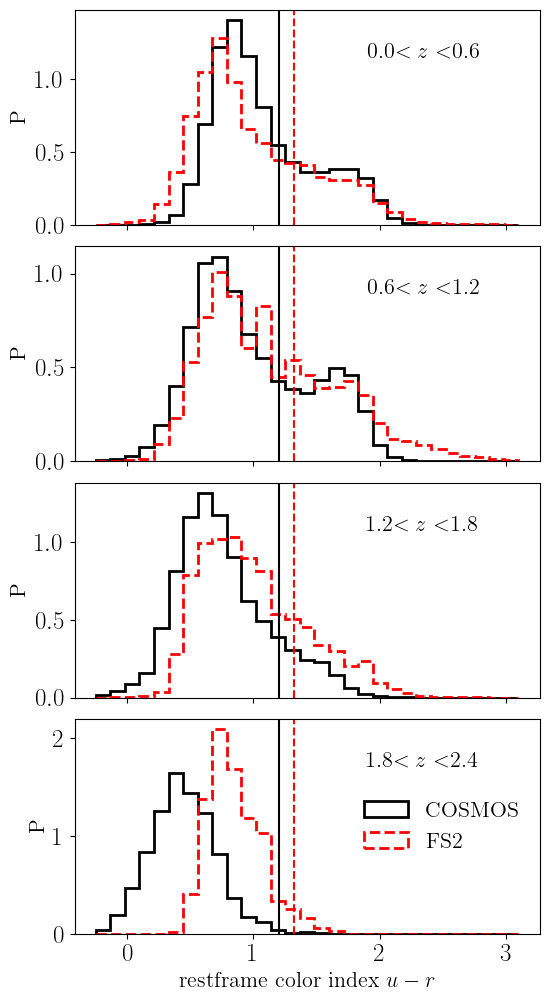

In [24]:
vzlo = [0.0,0.6,1.2,1.8]
vzhi = [0.6,1.2,1.8,2.4]


fig, ax = plt.subplots(len(vzlo),1,figsize=(6,len(vzlo)*3), sharex=True)
plt.subplots_adjust(hspace=0.1)

fontsize=16
fontsize_legend=16

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)

for i,zlo in enumerate(vzlo):

  zhi = vzhi[i]

  zlabel = str(zlo) + '$< z < $' + str(zhi)
  ax[i].text(0.75,0.8, zlabel, {'color': 'k', 'fontsize': fontsize}, ha='center', va='center', transform = ax[i].transAxes)

  smp_cosmos = cosmos[(zlo<=cosmos.photoz) & (cosmos.photoz<zhi)]
  smp_flagship = flagship[(zlo<=flagship.true_redshift_gal) & (flagship.true_redshift_gal<zhi)]

  ax[i].hist(smp_cosmos.ur, bins=c_bins, histtype='step', density=True,color='k',lw=2, ls='-',label='COSMOS')
  ax[i].hist(smp_flagship.ur, bins=c_bins, histtype='step', density=True,color='r',lw=2, ls='--',label='FS2')

  ax[i].set_ylabel('P', fontsize=fontsize)

  # vertrical lines for color cuts
  ax[i].axvline(x=ur_cut_cosmos, ls='-', c='k')
  ax[i].axvline(x=ur_cut_flagship, ls='--', c='r')

ax[-1].set_xlabel('restframe color index $u-r$',fontsize=fontsize)
ax[-1].legend(loc='center right',fontsize=fontsize_legend,frameon=False)

plt.savefig(fname,bbox_inches='tight', pad_inches = 0.1)

#plt.show()

In [25]:
#files.download(fname)

In [26]:
fname = 'cmz_distribution_cosmos_vs_fs2.pdf'

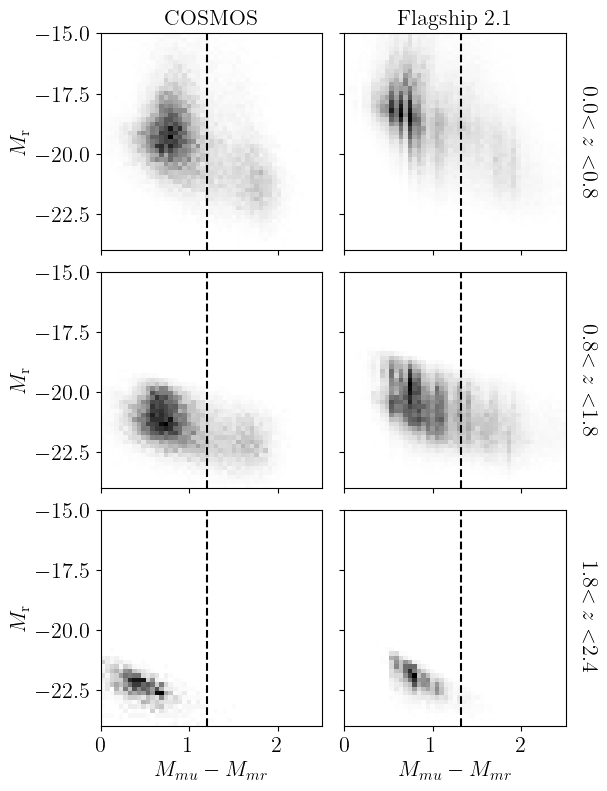

In [27]:
vzlo = [0.0,0.8,1.8]
vzhi = [0.8,1.8,2.4]

cmap='Greys'

fig, ax = plt.subplots(len(vzlo),2,figsize=(2*3,len(vzlo)*3), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

fontsize=16

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)

c_bins=np.linspace(0,2.5,50)
m_bins=np.linspace(-24,-15,50)
cm_bins=[c_bins,m_bins]

for i,zlo in enumerate(vzlo):

  zhi = vzhi[i]

  # redshift label
  zlabel = str(zlo) + '$ < z < $' + str(zhi)
  ax[i,1].text(1.1,0.5, zlabel, {'color': 'k', 'fontsize': fontsize}, ha='center', va='center', transform = ax[i,1].transAxes, rotation=-90)

  smp_cosmos = cosmos[(zlo<=cosmos.photoz) & (cosmos.photoz<zhi)]
  smp_flagship = flagship[(zlo<=flagship.true_redshift_gal) & (flagship.true_redshift_gal<zhi)]

  ax[i,0].hist2d(smp_cosmos.ur, smp_cosmos.m_r, bins=cm_bins, density=True,label='COSMOS',cmap=cmap)
  ax[i,1].hist2d(smp_flagship.ur, smp_flagship.subaru_r_abs_mag, bins=cm_bins, density=True,label='COSMOS',cmap=cmap)

  ax[i,0].set_ylabel(r'$M_{\rm r}$', fontsize=fontsize)

  # vertrical lines for color cuts
  ax[i,0].axvline(x=ur_cut_cosmos, ls='--', c='k')
  ax[i,1].axvline(x=ur_cut_flagship, ls='--', c='k')

for i  in range(2):
  ax[-1,i].set_xlabel('$M_{\rm u}-M_{\rm r}$',fontsize=fontsize)

ax[0,0].set_title('COSMOS',fontsize=fontsize)
ax[0,1].set_title('Flagship 2.1',fontsize=fontsize)


plt.savefig(fname,bbox_inches='tight', pad_inches = 0.1)

plt.show()

In [28]:
files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fraction of blue galaxies as function of redshift

#### compute redshift histogram

In [29]:
z_min, z_max, Nzbin = 0.0,2.5,16

In [30]:
# COSMOS
Nz_cosmos, z_edges = np.histogram(cosmos.photoz, bins=np.linspace(z_min, z_max, Nzbin))
Nz_cosmos_r, z_edges = np.histogram(cosmos_r.photoz, bins=np.linspace(z_min, z_max, Nzbin))
Nz_cosmos_b, z_edges = np.histogram(cosmos_b.photoz, bins=np.linspace(z_min, z_max, Nzbin))

fracz_r_cosmos = Nz_cosmos_r / Nz_cosmos.astype(float)
fracz_b_cosmos = Nz_cosmos_b / Nz_cosmos.astype(float)

# Flagship
Nz_flagship, z_edges = np.histogram(flagship.true_redshift_gal, bins=np.linspace(z_min, z_max, Nzbin))
Nz_flagship_r, z_edges = np.histogram(flagship_r.true_redshift_gal, bins=np.linspace(z_min, z_max, Nzbin))
Nz_flagship_b, z_edges = np.histogram(flagship_b.true_redshift_gal, bins=np.linspace(z_min, z_max, Nzbin))

fracz_r_flagship = Nz_flagship_r / Nz_flagship.astype(float)
fracz_b_flagship = Nz_flagship_b / Nz_flagship.astype(float)

In [31]:
z_centers = (z_edges[1:]+z_edges[:-1])*0.5

# plot fraction of blues vs redshift

In [32]:
fname = 'frac_blue_cosmos_vs_fs2.pdf'

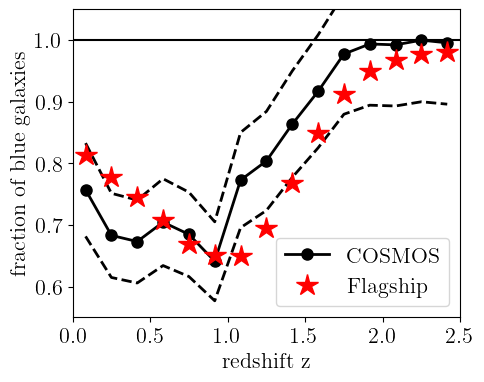

In [33]:
x = np.linspace(0,3,100)

plt.figure(figsize=(5,4))

plt.xlim(0,2.5)
plt.ylim(0.55,1.05)

fs = 16
lw = 2

plt.plot(z_centers, fracz_b_cosmos, c='k', linewidth=lw, linestyle='-', marker='o',markersize=8, label='COSMOS')
plt.plot(z_centers, fracz_b_cosmos*1.1, c='k', linewidth=lw, linestyle='--', marker='',markersize=8)
plt.plot(z_centers, fracz_b_cosmos*0.9, c='k', linewidth=lw, linestyle='--', marker='',markersize=8)


plt.plot(z_centers, fracz_b_flagship, c='r', linewidth=lw*2, linestyle='', marker='*', markersize=16, label='Flagship')


plt.legend(fontsize=fs,loc='lower right')
plt.hlines(1.0,0,3,color='k')
plt.xlabel('redshift z', fontsize=fs)
plt.ylabel('fraction of blue galaxies', fontsize=fs)

plt.tick_params(axis='both', which='major', labelsize=fs)
plt.tick_params(axis='both', which='minor', labelsize=fs)

plt.savefig(fname,bbox_inches='tight', pad_inches = 0.1)

In [34]:
files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# compare axis ratio distribution in volume limited samples

In [35]:
zm_low = []

dm,dz = 1.0, 0.1

zm_low.append([0.2,-18.5])
zm_low.append([0.2,-19.5])
zm_low.append([0.4,-19.5])
zm_low.append([0.4,-20.5])
zm_low.append([0.6,-20.5])
zm_low.append([0.6,-21.5])
zm_low.append([0.8,-21.5])
zm_low.append([1.0,-22.5])


zm_low = []

dm,dz = 1.0, 0.2

zm_low.append([0.1,-19.5])
zm_low.append([0.4,-20.5])
zm_low.append([0.7,-21.5])
zm_low.append([1.0,-22.5])
zm_low.append([1.3,-23.0])


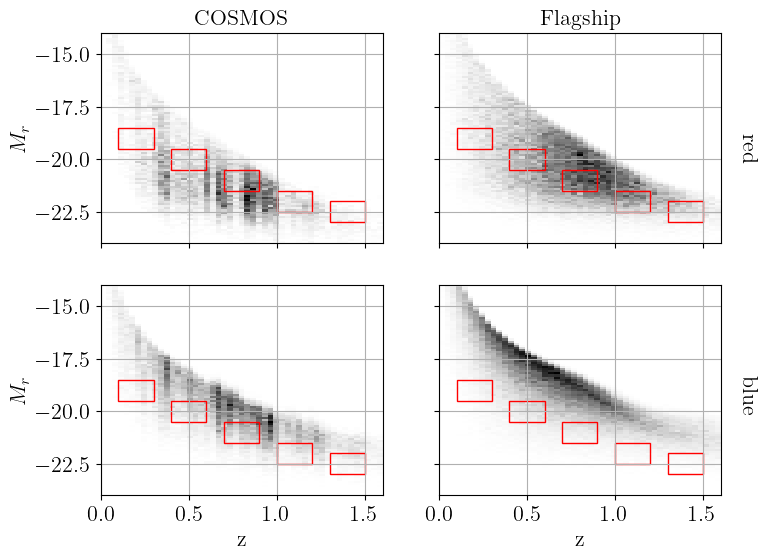

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6), sharex=True, sharey=True)
#plt.subplots_adjust(wspace=0.1, hspace=0.1)

fontsize=16

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)

z_bins = np.linspace(0,1.6, 50)
m_bins=np.linspace(-24,-14,100)

ax[0,0].hist2d(cosmos_r.photoz, cosmos_r.m_r, bins=[z_bins, m_bins], density=True, cmap='Greys')
ax[1,0].hist2d(cosmos_b.photoz, cosmos_b.m_r, bins=[z_bins, m_bins], density=True, cmap='Greys')

ax[0,1].hist2d(flagship_r.true_redshift_gal, flagship_r.subaru_r_abs_mag, bins=[z_bins, m_bins], density=True, cmap='Greys')
ax[1,1].hist2d(flagship_b.true_redshift_gal, flagship_b.subaru_r_abs_mag, bins=[z_bins, m_bins], density=True, cmap='Greys')

#smpID=8
#ax[0,0].scatter(smp_cosmos_b[smpID].photoz, smp_cosmos_b[smpID].mass_best, s=0.1)
#ax[0,1].scatter(smp_mice_b[smpID].true_redshift_gal, smp_mice_b[smpID].log_stellar_mass, s=0.1)

for i in range(len(ax)):
    for j in range(len(ax[i])):

        for low in zm_low:
            lim = patches.Rectangle(low,dz,dm,linewidth=1,edgecolor='r',facecolor='none')
            ax[i,j].add_patch(lim)


ax[0,0].set_title('COSMOS', {'color': 'k', 'fontsize': fontsize})
ax[0,1].set_title('Flagship', {'color': 'k', 'fontsize': fontsize})
ax[0,1].text(1.7, -20, 'red', {'color': 'k', 'fontsize': fontsize}, rotation=-90)
ax[1,1].text(1.7, -20, 'blue', {'color': 'k', 'fontsize': fontsize}, rotation=-90)

for i in range(2):
  ax[-1,i].set_xlabel('z', fontsize=fontsize)

for i in range(2):
    ax[i,0].set_ylabel('$M_r$', fontsize=fontsize)

    for j in range(2):
        ax[i,j].grid()

#plt.savefig('zm_samples.png')

plt.show()

In [37]:
smp_cosmos_r = []
smp_cosmos_b = []

smp_flagship_r = []
smp_flagship_b = []

In [38]:
for low in zm_low:
    smp = cosmos
    smp = smp[(low[0] <= smp.photoz) & (low[0]+dz > smp.photoz)]
    smp = smp[(low[1] <= smp.m_r) & (low[1]+dm > smp.m_r)]
    smp_cosmos_b.append(smp[smp.ur <= ur_cut_cosmos])
    smp_cosmos_r.append(smp[smp.ur > ur_cut_cosmos])

In [39]:
for low in zm_low:
    smp = flagship
    smp = smp[(low[0] <= smp.true_redshift_gal) & (low[0]+dz > smp.true_redshift_gal)]
    smp = smp[(low[1] <= smp.subaru_r_abs_mag) & (low[1]+dm > smp.subaru_r_abs_mag)]
    smp_flagship_b.append(smp[smp.ur <= ur_cut_flagship])
    smp_flagship_r.append(smp[smp.ur > ur_cut_flagship])

#

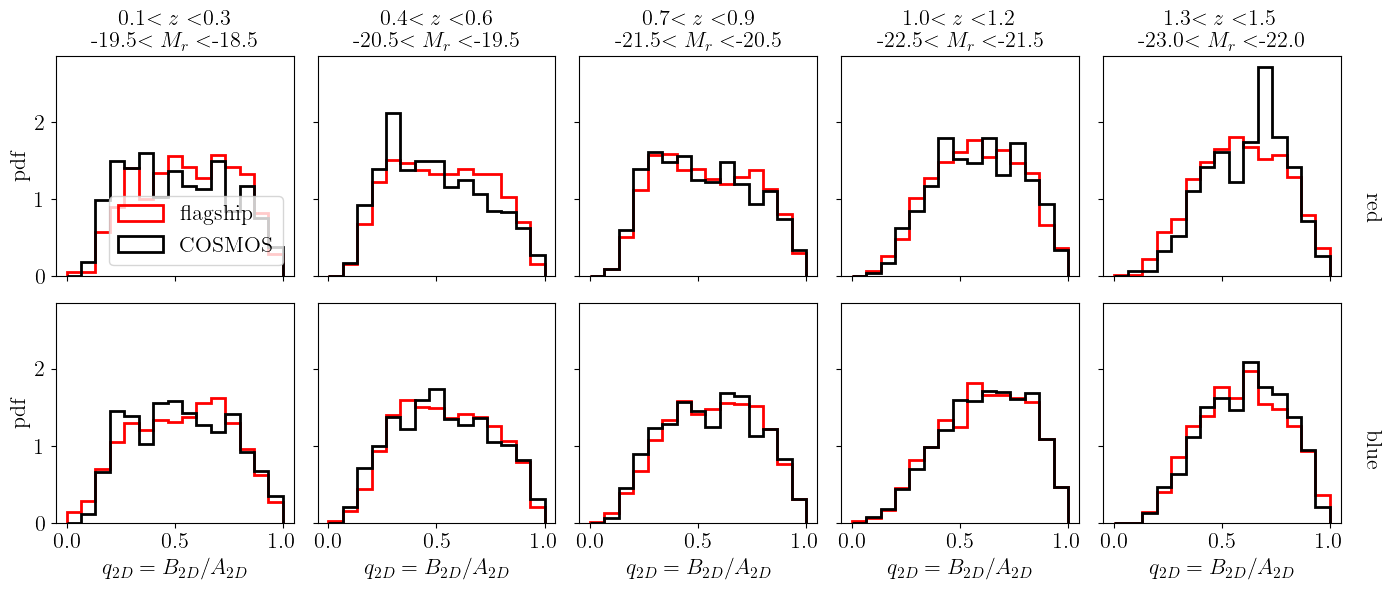

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(14,6), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0.0)

tx,ty = 0.1,0.2

lw=2

fontsize=16

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)
q_bins = np.linspace(0,1,16)

#==========================
ix=0
smpID = 0

iy = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

iy = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[0,ix].set_title(zm_label, fontsize=fontsize)


#==========================
ix=1
smpID = 1

iy = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

iy = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[0,ix].set_title(zm_label, fontsize=fontsize)


#==========================
ix=2
smpID = 2

iy = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

iy = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[0,ix].set_title(zm_label, fontsize=fontsize)

#==========================
ix=3
smpID = 3

iy = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

iy = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[0,ix].set_title(zm_label, fontsize=fontsize)

#==========================
ix=4
smpID = 4

iy = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

iy = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[0,ix].set_title(zm_label, fontsize=fontsize)

ax[0,-1].text(1.2, 0.75, 'red', {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')
ax[1,-1].text(1.2, 0.75, 'blue', {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')


#ax[0,0].set_title('red', fontsize=fontsize)
#ax[0,1].set_title('blue', fontsize=fontsize)
ax[0,0].legend(loc='lower right', fontsize=fontsize)

#ax[iy,0].legend(loc='lower right', fontsize=fontsize)

for ix in range(5):
    ax[-1,ix].set_xlabel('$q_{2D} = B_{2D} / A_{2D}$', fontsize=fontsize)

for iy in range(2):
    ax[iy,0].set_ylabel('pdf', fontsize=fontsize)

plt.tight_layout()
#plt.savefig('q2d_zm_samples_cosmos_flagship_v2.pdf')

plt.show()

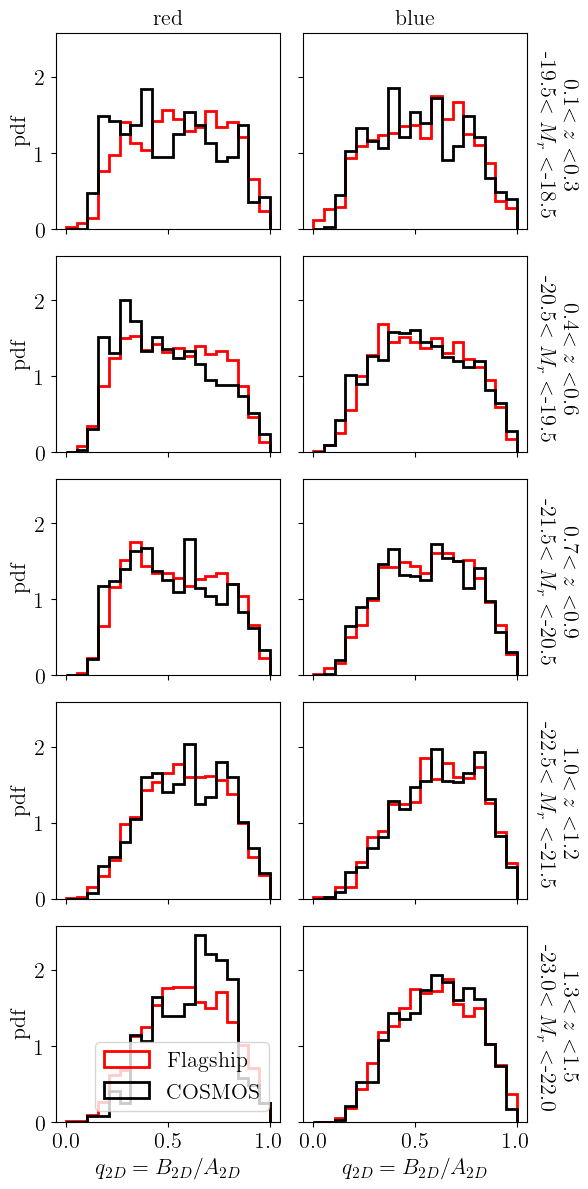

In [46]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(6,12), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.0, hspace=0.0)

fname = 'q2d_zm_samples_cosmos_flagship_v2.pdf'

tx,ty = 0.1,0.2

lw=2

fontsize=16

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=use_tex)
q_bins = np.linspace(0,1,20)

#==========================
iy=0
smpID = 0

ix = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='FS2')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

ix = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[iy,1].text(1.2, 0.2, zm_label, {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')


#==========================
iy=1
smpID = 1

ix = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='FS2')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

ix = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

ax[0,0].set_title('red', fontsize=fontsize)
ax[0,1].set_title('blue', fontsize=fontsize)


zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[iy,1].text(1.2, 0.2, zm_label, {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')



#==========================
iy=2
smpID = 2

ix = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='FS2')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

ix = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

ax[0,0].set_title('red', fontsize=fontsize)
ax[0,1].set_title('blue', fontsize=fontsize)


zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[iy,1].text(1.2, 0.2, zm_label, {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')


#==========================
iy=3
smpID = 3

ix = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='FS2')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

ix = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins)
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

ax[0,0].set_title('red', fontsize=fontsize)
ax[0,1].set_title('blue', fontsize=fontsize)


zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[iy,1].text(1.2, 0.2, zm_label, {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')


#==========================
iy=4
smpID = 4

ix = 0
ax[iy,ix].hist(smp_flagship_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='Flagship')
ax[iy,ix].hist(smp_cosmos_r[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins, label='COSMOS')

ix = 1
ax[iy,ix].hist(smp_flagship_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='r', bins=q_bins, label='Flagship')
ax[iy,ix].hist(smp_cosmos_b[smpID].q_proj, density=True, histtype='step', lw=lw, color='k', bins=q_bins)

ax[0,0].set_title('red', fontsize=fontsize)
ax[0,1].set_title('blue', fontsize=fontsize)


zstr = str(zm_low[smpID][0]) + '$ < z < $' + str(round(zm_low[smpID][0] + dz,2))
mstr = str(zm_low[smpID][1]) + '$ < M_r < $' + str(zm_low[smpID][1] + dm)
zm_label = zstr + '\n' + mstr
ax[iy,1].text(1.2, 0.2, zm_label, {'color': 'k', 'fontsize': fontsize}, rotation=-90, horizontalalignment='center')



ax[0,0].set_title('red', fontsize=fontsize)
ax[0,1].set_title('blue', fontsize=fontsize)
ax[iy,0].legend(loc='lower right', fontsize=fontsize)

ax[iy,0].legend(loc='lower right', fontsize=fontsize)

for ix in range(2):
    ax[-1,ix].set_xlabel('$q_{2D} = B_{2D} / A_{2D}$', fontsize=fontsize)

for iy in range(5):
    ax[iy,0].set_ylabel('pdf', fontsize=fontsize)

plt.tight_layout()
plt.savefig(fname)

plt.show()

In [47]:
files.download(fname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>